<a href="https://colab.research.google.com/github/amityv0113/Number-Plate-Detection/blob/master/number_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from zipfile import ZipFile

In [123]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [124]:
pwd 

'/content/drive/My Drive'

In [125]:
cd drive/My\ Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


In [126]:
ls


 1543852077282_UTIITSL_ePAN_G013266284_03122018_195133.pdf
 AA1520732281433328828811.pdf
'amit 31 (1).jpeg'
'amit 31.jpeg'
'Amit_CV1 (1).pdf'
'Amit_CV1 (2).pdf'
'Amit_CV (1).gdoc'
 Amit_CV1.pdf
 Amit_CV.gdoc
 Amit_CV.pdf
'Authorization certificate.gdoc'
 c++/
'Colab Notebooks'/
 College/
'COMMUNICATION BOOK.pdf'
 Communication_Skills_Class_Notes_jn_2018.pdf
 Coursera.pdf
'dynamic-trees(1).pdf'
 dynamic-trees.pdf
'Getting started.pdf'
 IMG_20170814_153318.jpg
 IMG_20170814_153422.jpg
 IMG_20170814_154844.jpg
 IMG_20170820_185646.jpg
 IMG_20170820_185650.jpg
 IMG_20170820_185655.jpg
 IMG_20170820_190357.jpg
 IMG_20170825_172741.jpg
 IMG_20170825_183417.jpg
 IMG_20170825_183950.jpg
 in.gov.pan-PANCR-AYNPY3039N.pdf
'Introduction to Machine Learning.jpg'
'Introduction to Machine Learning.pdf'
 List_of_companys_to_apply_for.gsheet
 my.pdf
'New Doc 2019-03-16 21.29.41 (1).pdf'
'New Doc 2019-03-16 21.29.41.pdf'
'N.N. Bhargava- Basic Electronics and linear circuits.pdf'
'nptel hall ticket.pdf'


In [0]:
file_name="train.zip"

In [128]:
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
import os
import numpy as np
import cv2 as cv

In [0]:
letters = [
'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
'U', 'V', 'W', 'X', 'Y', 'Z'
]


In [131]:
def read_training_data(training_directory):
  image_data = []
  target_data = []
  for i in letters:
    for j in range(10):
      image_path = os.path.join(training_directory,i,i + '_' + str(j) + '.jpg')
      img =cv.imread(image_path,0)
      resized = img.reshape(-1)
      image_data.append(resized)
      target_data.append(i)
  return (np.array(image_data), np.array(target_data))

print('reading data.......')
training_dataset_dir = '/content/drive/My Drive/train20X20 (copy)'
image_data, target_data = read_training_data(training_dataset_dir)
print('.....completed')

reading data.......
.....completed


In [132]:
print(target_data.shape)
print(image_data.shape)

(340,)
(340, 400)


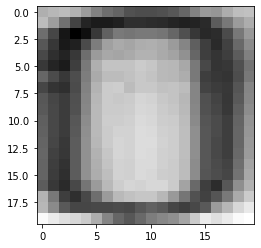

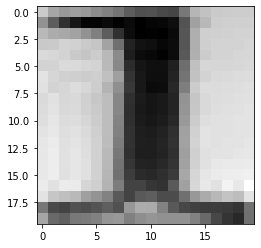

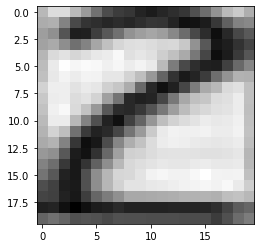

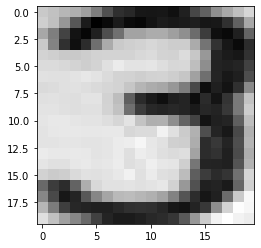

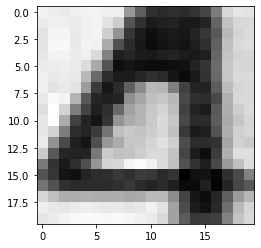

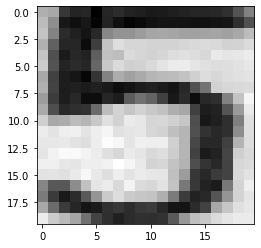

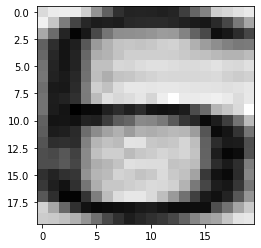

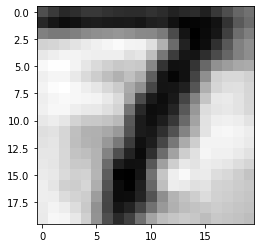

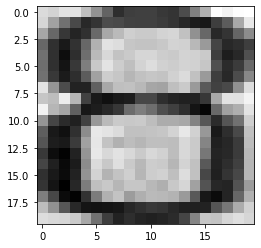

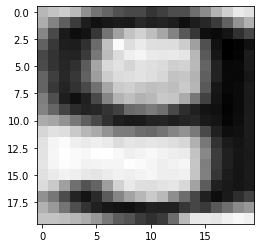

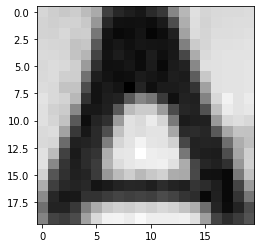

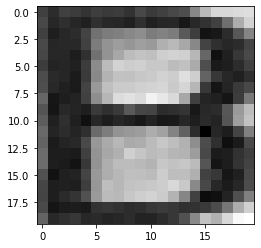

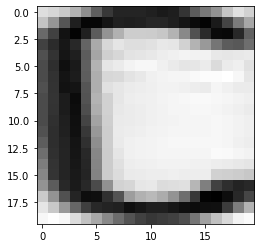

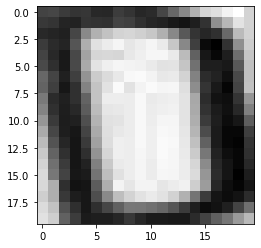

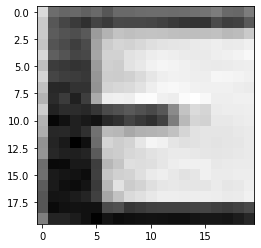

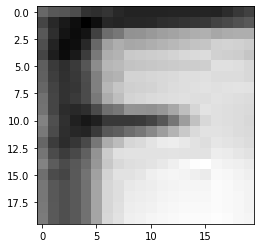

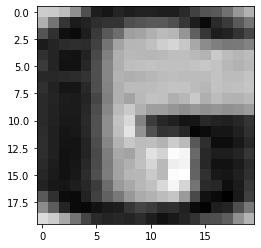

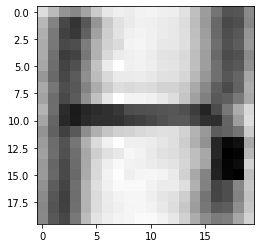

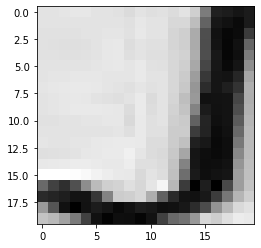

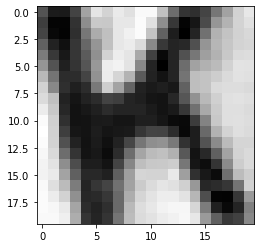

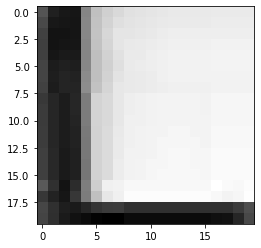

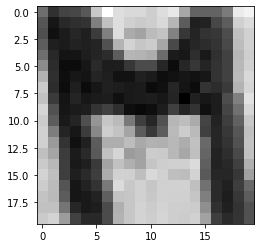

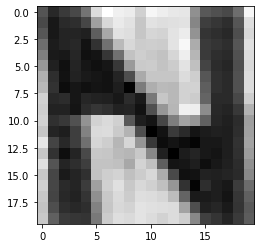

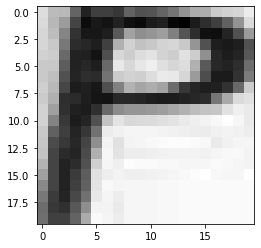

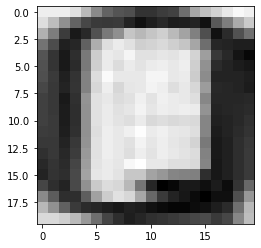

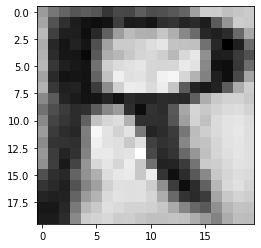

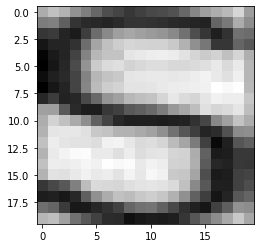

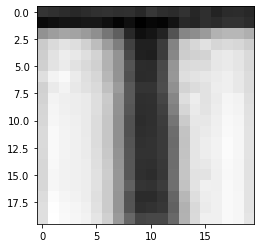

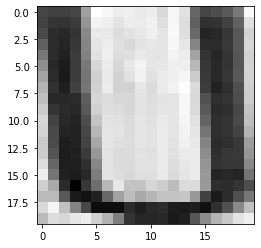

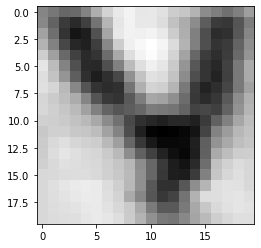

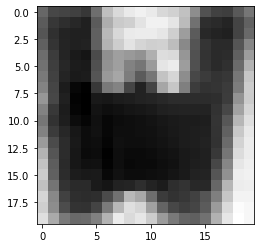

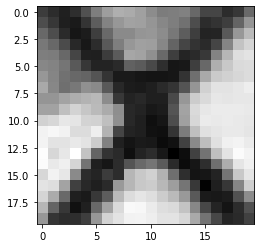

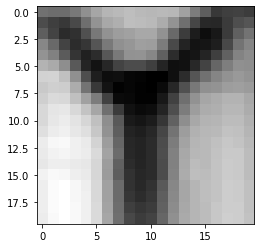

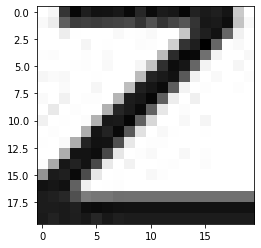

In [133]:
import matplotlib.pyplot as plt
for i in range(1,340,10):
  img = image_data[i]
  img = img.reshape((20,20))
  plt.imshow(img,cmap='gray')
  plt.axis("on")
  plt.show()
#plt.title(train.iloc[0,0])


In [134]:
# Normalize the data
image_data = image_data / 255.0
print(image_data[7].min(),"-",image_data[7].max())

0.0 - 1.0


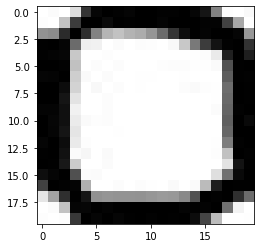

In [135]:
#after normalization 
img = image_data[7]
img = img.reshape((20,20))
plt.imshow(img,cmap='gray')
plt.axis("on")
plt.show()

In [136]:
image_data=image_data.reshape(-1,20,20,1)
print("Image_data shape: ",image_data.shape)

Image_data shape:  (340, 20, 20, 1)


In [137]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values = array(target_data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
print(onehot_encoded.shape)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '5' '5' '5' '5'
 '5' '5' '5' '5' '5' '5' '6' '6' '6' '6' '6' '6' '6' '6' '6' '6' '7' '7'
 '7' '7' '7' '7' '7' '7' '7' '7' '8' '8' '8' '8' '8' '8' '8' '8' '8' '8'
 '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'E' 'E' 'E' 'E'
 'E' 'E' 'E' 'E' 'E' 'E' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'G' 'G'
 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'J' 'J' 'J' 'J' 'J' 'J' 'J' 'J' 'J' 'J' 'K' 'K' 'K' 'K' 'K' 'K' 'K' 'K'
 'K' 'K' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'Q' 'Q' 'Q' 'Q' 'Q' 'Q' 'Q

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(image_data,onehot_encoded, test_size = 0.2)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_test.shape)

x_train shape (272, 20, 20, 1)
x_test shape (68, 20, 20, 1)
y_train shape (272, 34)
y_test shape (68, 34)


In [0]:
from tensorflow.python.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D, Flatten
from tensorflow.python.keras import Sequential

#create model
model = Sequential()

# New Section

In [140]:
#add model layers
model.add(Conv2D(filters=64, kernel_size = (3,3),padding='Same', activation="relu", input_shape=(( 20, 20, 1))))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size = (3,3),padding='Same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.50))
model.add(Dense(34,activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.build(input_shape=((None,20,20,1)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 20, 20, 64)        640       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 3200)             

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [145]:
model.fit(X_train,Y_train,epochs=40,verbose=2,validation_data=(X_test,Y_test))

Epoch 1/40
9/9 - 0s - loss: 0.0254 - accuracy: 0.9926 - val_loss: 0.1197 - val_accuracy: 0.9706
Epoch 2/40
9/9 - 0s - loss: 0.0162 - accuracy: 0.9963 - val_loss: 0.1174 - val_accuracy: 0.9559
Epoch 3/40
9/9 - 0s - loss: 0.0198 - accuracy: 0.9963 - val_loss: 0.1027 - val_accuracy: 0.9559
Epoch 4/40
9/9 - 0s - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0770 - val_accuracy: 0.9853
Epoch 5/40
9/9 - 0s - loss: 0.0191 - accuracy: 0.9963 - val_loss: 0.1115 - val_accuracy: 0.9706
Epoch 6/40
9/9 - 0s - loss: 0.0159 - accuracy: 0.9963 - val_loss: 0.0761 - val_accuracy: 0.9706
Epoch 7/40
9/9 - 0s - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9853
Epoch 8/40
9/9 - 0s - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0843 - val_accuracy: 0.9559
Epoch 9/40
9/9 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1417 - val_accuracy: 0.9706
Epoch 10/40
9/9 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9706
Epoch 11/40
9/9 - 0s - loss: 0.0063 - a

ERROR! Session/line number was not unique in database. History logging moved to new session 73
9
D
1
3
Y
V
A
B
S
E
7
X
L
N
F
V


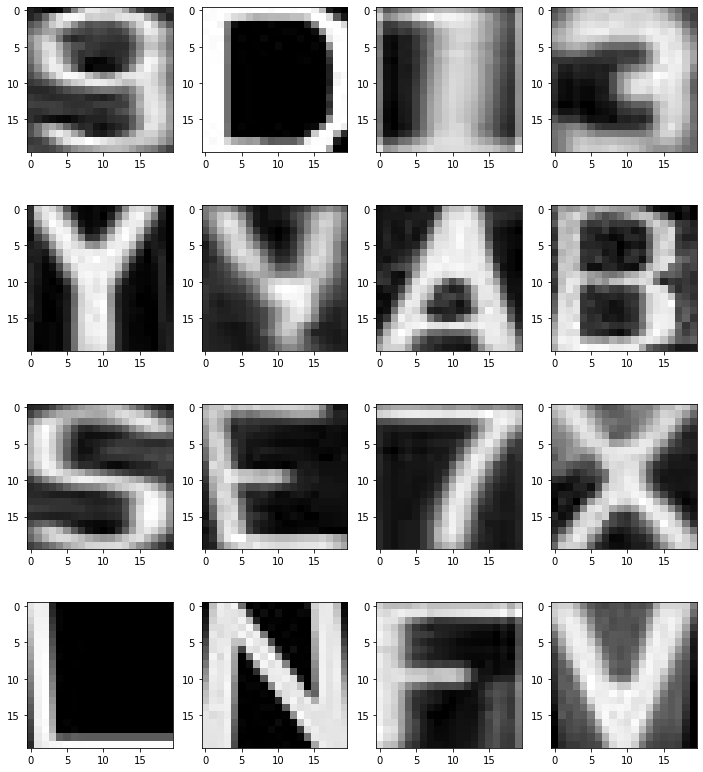

In [146]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 20, 20)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
  ax.imshow(X_test__[i], cmap='binary')
  num=y_pred[i].argmax()
  if num <=33 and num>0:
    if (num==1):
      print(1)
    elif(num==2):
      print(2)
    elif(num==3):
      print(3)
    elif(num==4):
      print(4)
    elif(num==5):
      print(5)
    elif(num==6):
      print(6)
    elif(num==7):
      print(7)
    elif(num==8):
      print(8)
    elif(num==9):
      print(9)
    elif(num==10):
      print("A")
    elif(num==11):
      print("B")
    elif(num==12):
      print("C")
    elif(num==13):
      print("D")
    elif(num==14):
      print("E")
    elif(num==15):
      print("F")
    elif(num==16):
      print("G")
    elif(num==17):
      print("H")
    elif(num==18):
      print("J")
    elif(num==19):
      print("K")
    elif(num==20):
      print("L")
    elif(num==21):
      print("M")
    elif(num==22):
      print("N")
    elif(num==23):
      print("P")
    elif(num==24):
      print("Q")
    elif(num==25):
      print("R")
    elif(num==26):
      print("S")
    elif(num==27):
      print("T")
    elif(num==28):
      print("U")
    elif(num==29):
      print("V")
    elif(num==30):
      print("W")
    elif(num==31):
      print("X")
    elif(num==32):
      print("Y")
    else:
      print("Z")
  else:
    print(0)